# CNN

In [1]:
#TensorFlowがGPUを認識しているか確認
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWa

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7480355612148436931, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11660980289065082405
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9220904896319984440
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3529506816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8517608385093256816
 physical_device_desc: "device: 0, name: GeForce GTX 980, pci bus id: 0000:01:00.0, compute capability: 5.2"]

In [1]:
#tensorflowをtfとしてインポート
import tensorflow as tf

#pltをインポート
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re

/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWa

In [3]:
#import circle.py
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

x_train, x_test, y_train, y_test = np.load('./data/dataset.npy', allow_pickle = True)
batch_size = 1
epochs = 1

#モデルを作成
model = Sequential()
#conv１層目
model.add(Conv2D(1, (3, 3), padding='same', input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#conv２層目
model.add(Conv2D(2, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#conv３層目
#model.add(Conv2D(128, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
        
#conv４層目
#model.add(Conv2D(256, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#conv５層目
#model.add(Conv2D(512, (3, 3), padding='same'))
#model.add(Activation('relu'))
        
#conv６層目
#model.add(Conv2D(256, (1, 1), padding='same'))
#model.add(Activation('relu'))

#conv７層目          
#model.add(Conv2D(512, (3, 3), padding='same'))
#model.add(Activation('relu'))

#conv８層目          
#model.add(Conv2D(256, (1, 1), padding='same'))
#model.add(Activation('relu'))
          
model.add(Flatten())
#model.add(Dropout(0.5))
#model.add(Dense(64))
#model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
          
# サマリーを出力
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 1)         10        
_________________________________________________________________
activation_4 (Activation)    (None, 64, 64, 1)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 2)         20        
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 2)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 2)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
__________

In [6]:
#モデルのコンパイル
WEIGHTS_PATH = 'layer2channel1_weights.hdf5'
model.load_weights(WEIGHTS_PATH)
model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

#予測
history = model.fit(x_train, y_train, epochs=20, validation_data = (x_test, y_test))

Train on 35840 samples, validate on 8960 samples
Epoch 1/20
35840/35840 [==============================] - 4s 125us/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.0082 - val_acc: 0.9972
Epoch 2/20
35840/35840 [==============================] - 4s 118us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 0.9972
Epoch 3/20
35840/35840 [==============================] - 4s 119us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9984
Epoch 4/20
35840/35840 [==============================] - 4s 118us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9977
Epoch 5/20
35840/35840 [==============================] - 4s 119us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9983
Epoch 6/20
35840/35840 [==============================] - 4s 119us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9979
Epoch 7/20
35840/35840 [==============================] - 4s 120us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0075 - v

In [5]:
#学習済みのモデルでテスト
score = model.evaluate(x_test, y_test)
print('test loss:',score[0])
print('test acc:',score[1])

8960/8960 [==============================] - 1s 95us/step
test loss: 1.4574745453696128e-07
test acc: 1.0


In [6]:
# 学習結果を表示
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(loss)

#訓練データ(トレーニングデータ)とは、機械学習の教師あり学習において、人工知能のニューラルネットワークがあらかじめ与えられる、例題と答えについてのデータ。
#この大量のデータをもとに、ニューラルネットワーク自体が出力結果の正否を判断し、最適化を行う。
#統計学や機械学習において何らかの推定を行う際に、トレーニングデータだけでは学習されたモデルを十分に評価できないという問題がある。
#この問題は過剰適合や過学習と呼ばれる。この問題を解決するために、学習に用いないデータを用意し、いくつかの学習モデルの評価を行うことがある。
#この、評価を行うためのデータがテストデータと呼ばれる。
#交差検証においては、標本データをあらかじめトレーニングデータとテストデータに分割し、トレーニングデータで学習し、
#テストデータに学習モデルを適用させることで性能の評価を行う。
plt.plot(range(epochs), loss, label='loss(training data)') #トレーニングデータに対する判定結果のloss
plt.plot(range(epochs), val_loss, label='val_loss(test data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(range(epochs), acc, label='acc(training data)')
plt.plot(range(epochs), val_acc,  label='val_acc(test data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

KeyError: 'accuracy'

In [6]:
classes = model.predict(x_test, batch_size=128, verbose=True)
print(classes[0])

8960/8960 [==============================] - 0s 50us/step
[1.7951113e-09 1.0000000e+00]


In [11]:
#circleに対して、各画像のクラス確率
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import numpy as np
import glob

# テストする画像が入っているディレクトリ
img_path = './data/circle/'

img_list = glob.glob(img_path + '*')
size = (64, 64, 1)

for index, i in enumerate(img_list):
    # 画像をサイズを変えて読み込み、配列化
    test_img = img_to_array(load_img(i, grayscale=True, target_size=size))
    # 0~1の範囲にする
    test_img = test_img / 255
    # 4次元配列に
    test_img = test_img[np.newaxis, ...]
    # 予測
    pre = model.predict(test_img)
    #if np.max(pre[0]) == pre[0, 0]:
     #   print(f'{img_list[index]} -> {pre} は circle')
    if np.max(pre[0]) == pre[0, 1]:
        print(f'{img_list[index]} -> {pre} は other')
        

In [25]:
#circleに対して、各画像のクラス確率
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import numpy as np
import glob

# テストする画像が入っているディレクトリ
img_path = './data/other/'

img_list = glob.glob(img_path + '*')
size = (64, 64, 1)

for index, i in enumerate(img_list):
    # 画像をサイズを変えて読み込み、配列化
    test_img = img_to_array(load_img(i, grayscale=True, target_size=size))
    # 0~1の範囲にする
    test_img = test_img / 255
    # 4次元配列に
    test_img = test_img[np.newaxis, ...]
    # 予測
    pre = model.predict(test_img)
    if np.max(pre[0]) == pre[0, 0]:
        print(f'{img_list[index]} -> {pre} は circle')
        #if np.max(pre[0]) == pre[0, 1]:
         #   print(f'{img_list[index]} -> {pre} は other')

In [5]:
#save model
model_layer2channel1_json = model.to_json()
open("model_architecture.json", mode='w').write(model_layer2channel1_json)

#save weight
model.save_weights("layer2channel1_weights.hdf5")

In [9]:
#出力する中間層を指定
layer_outputs = [layer.output for layer in model.layers[0:6]]
layer_outputs

[<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 64, 64, 2) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(?, 64, 64, 2) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 32, 32, 2) dtype=float32>,
 <tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'activation_2/Relu:0' shape=(?, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 16, 16, 3) dtype=float32>]

In [10]:
#中間層を出力するモデルを作成
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 2)         20        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 2)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         57        
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 3)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 3)         0         
Total para

In [20]:
weights = model.get_layer("conv2d_2").get_weights()[0]
weights.shape
weights

array([[[[-0.2206546 ,  0.00501592, -0.26470432],
         [ 0.9095327 ,  0.9009375 , -0.37983507]],

        [[-0.22249958, -0.14039417,  0.006656  ],
         [ 0.69379836,  0.1867752 , -0.35738868]],

        [[-0.567179  ,  0.05778028, -0.16729088],
         [ 0.35049447,  0.68656236, -0.42309698]]],


       [[[ 0.15881315, -0.09112888,  0.27642033],
         [ 0.6352206 , -0.01584808, -0.06245955]],

        [[ 0.22239105,  0.05043314, -0.03615238],
         [ 0.8220208 , -0.7111475 , -0.51203185]],

        [[-0.02268911, -0.17690933,  0.13262643],
         [ 0.90476656, -0.50630105, -0.3520477 ]]],


       [[[-0.05807273, -0.06222914,  0.16537751],
         [ 0.26103002,  0.9341995 , -0.16646078]],

        [[-0.11415138,  0.0655703 ,  0.3592113 ],
         [ 0.47086972,  0.4201988 , -0.2678395 ]],

        [[ 0.10650814,  0.0505979 , -0.33318737],
         [ 0.7077187 ,  0.308249  , -0.12868139]]]], dtype=float32)

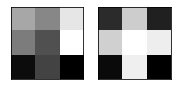

In [24]:
def plot_conv_weights(filters):
    filter_num = filters.shape[3]
    
    for i in range(filter_num):
        plt.subplot(filter_num/6 + 1, 4, i+1)
        plt.imshow(filters[:,:,0,i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        
plot_conv_weights(model.layers[0].get_weights()[0])

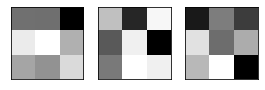

In [35]:
def plot_conv_weights(filters):
    filter_num = filters.shape[3]
    
    for i in range(filter_num):
        plt.subplot(filter_num/6 + 1, 4, i+1)
        plt.imshow(filters[:,:,0,i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        
plot_conv_weights(model.layers[3].get_weights()[0])

(1, 64, 64, 1)
(1, 64, 64, 2)


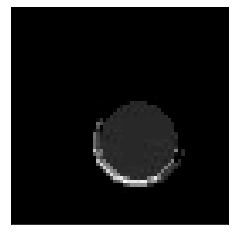

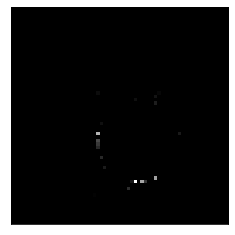

In [27]:
#円の特徴マップ
#check input image
img_path = './data/circle/circler12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/circle/lay2chan23circle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 3)


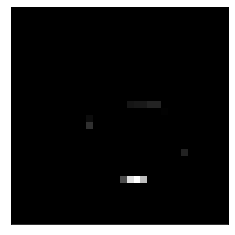

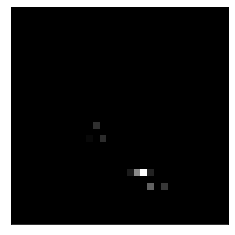

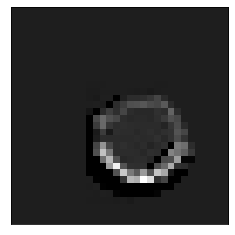

In [37]:
#円の特徴マップ
#check input image
img_path = './data/circle/circler12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(3):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/circle/lay2chan23secondcircle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


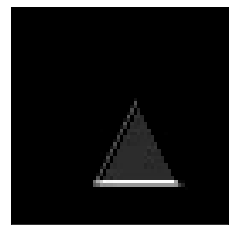

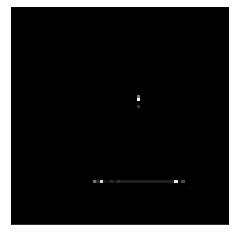

In [38]:
#三角形の特徴マップ
#check input image
img_path = './data/other/triangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/triangle/lay2chan23triangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 3)


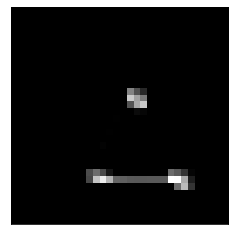

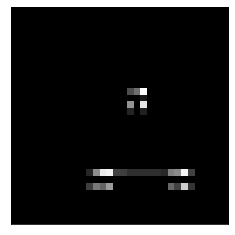

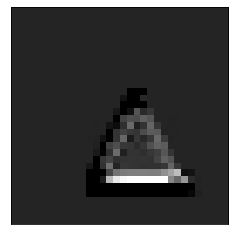

In [44]:
#三角形の特徴マップ
#check input image
img_path = './data/other/triangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(3):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/triangle/lay2chan23secondtriangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


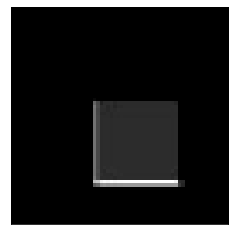

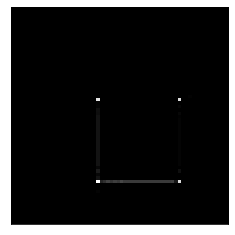

In [45]:
#四角形の特徴マップ
#check input image
img_path = './data/other/rectangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/rectangle/lay2chan23rectangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 3)


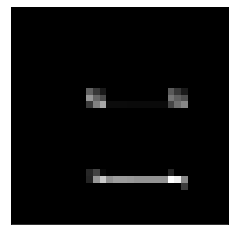

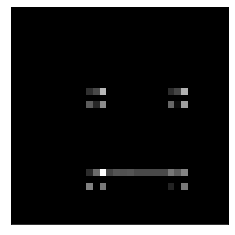

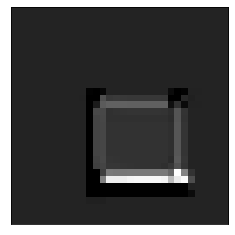

In [47]:
#四角形の特徴マップ
#check input image
img_path = './data/other/rectangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(3):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/rectangle/lay2chan23secondrectangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


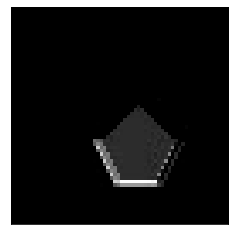

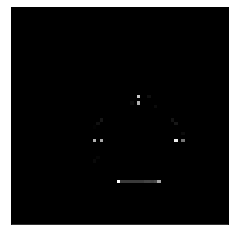

In [48]:
#五角形の特徴マップ
#check input image
img_path = './data/other/pentagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/pentagon/lay2chan23pentagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 3)


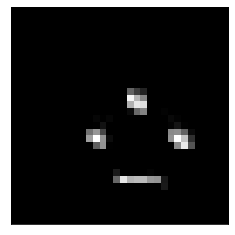

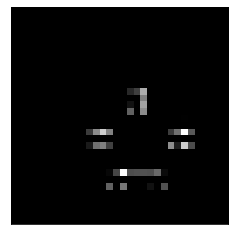

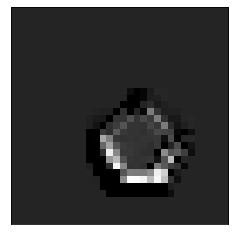

In [50]:
#五角形の特徴マップ
#check input image
img_path = './data/other/pentagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(3):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/pentagon/lay2chan23secondpentagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 2)


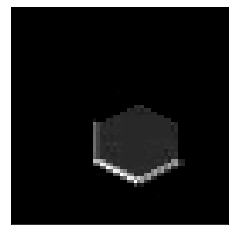

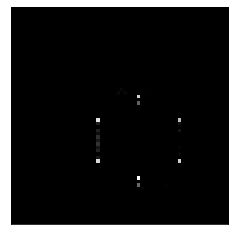

In [52]:
#六角形の特徴マップ
#check input image
img_path = './data/other/hexagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(2):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/hexagon/lay2chan23hexagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 32, 32, 3)


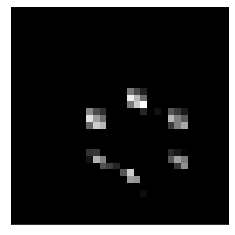

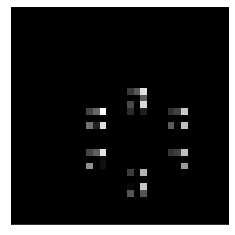

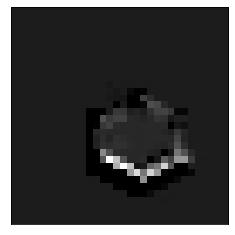

In [51]:
#六角形の特徴マップ
#check input image
img_path = './data/other/hexagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[4]
print(first_layer_activation.shape)

k = 0
for i in range(3):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l2c23/hexagon/lay2chan23secondhexagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()